In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:


df_7 = pd.read_csv('../data/topics.csv')
fuente_7 = "https://github.com/github/innovationgraph/tree/main"



Muestra mediante un head() los principales datasets con los que vas a trabajar

In [5]:
df_7

,num_pushers,topic,iso2_code,year,quarter
0,7206,python,EU,2020,1
1,6739,python,US,2020,1
2,5231,javascript,EU,2020,1
3,5025,javascript,US,2020,1
4,3874,java,EU,2020,1
...,...,...,...,...,...
58405,101,bigdata,US,2024,3
58406,101,event-driven,US,2024,3
58407,101,bukkit,US,2024,3
58408,101,risc-v,US,2024,3


In [6]:
# Eliminamos la agrupación de valores en Europa,  ya que estos también estaban representados mediante los países independientes que lo componen. Por lo que estarían duplicados.


df_7_clean = df_7[df_7["iso2_code"] != "EU"]

In [7]:
# Eliminamos los temas relacionados con consultas sobre github. Ya que no son representativos para el estudio. 

df_7_clean = df_7_clean[~df_7_clean["topic"].isin(["config", "github-config"])]

In [8]:
df_7_clean

,num_pushers,topic,iso2_code,year,quarter
1,6739,python,US,2020,1
3,5025,javascript,US,2020,1
5,3733,react,US,2020,1
6,2977,java,US,2020,1
9,2632,nodejs,US,2020,1
...,...,...,...,...,...
58405,101,bigdata,US,2024,3
58406,101,event-driven,US,2024,3
58407,101,bukkit,US,2024,3
58408,101,risc-v,US,2024,3


In [9]:
df_7_clean["topic"] = df_7_clean["topic"].str.replace("reactjs","react")

In [10]:
df_7_clean["topic"] = df_7_clean["topic"].str.replace("python3","python")

In [11]:
df_7_clean

,num_pushers,topic,iso2_code,year,quarter
1,6739,python,US,2020,1
3,5025,javascript,US,2020,1
5,3733,react,US,2020,1
6,2977,java,US,2020,1
9,2632,nodejs,US,2020,1
...,...,...,...,...,...
58405,101,bigdata,US,2024,3
58406,101,event-driven,US,2024,3
58407,101,bukkit,US,2024,3
58408,101,risc-v,US,2024,3


In [12]:
# En el dataset de Temas (topics), el tema Hacktoberfest está escrito de diferentes maneras (Hactober, Hackoberfest2020, Hacktoberfest2021, Hackberfest…) por lo que se ha procedido a agrupar todos ellos con el nombre de Hactoberfest. Ya que el año ya lo tenemos representado en la columna “year”.

# Step 1: Modify the 'topic' column to group all hacktoberfest topics under 'hacktoberfest'
df_7_clean['topic'] = df_7_clean['topic'].apply(
    lambda x: 'hacktoberfest' if 'hacktober' in x.lower() else x
)


In [13]:
# Agrupamos por año, trimestre y tema. Y sumamos el numero de subidas. 

df_7_grouped =df_7_clean.groupby(['year', "quarter",'topic'])['num_pushers'].sum().reset_index()
df_7_grouped

,year,quarter,topic,num_pushers
0,2020,1,3d,156
1,2020,1,accessibility,135
2,2020,1,admin,141
3,2020,1,ai,468
4,2020,1,algorithm,754
...,...,...,...,...
16248,2024,3,zero-knowledge,110
16249,2024,3,zig,155
16250,2024,3,zod,378
16251,2024,3,zsh,948


In [14]:
# Ordenamos los valores

df_7_grouped_sorted = df_7_grouped.sort_values(by=['year', "quarter",'num_pushers'], ascending=[True, True, False])
df_7_grouped_sorted

,year,quarter,topic,num_pushers
432,2020,1,python,31021
288,2020,1,javascript,21057
441,2020,1,react,18769
286,2020,1,java,13016
377,2020,1,nodejs,10685
...,...,...,...,...
16067,2024,3,shell-script,101
16086,2024,3,speech-recognition,101
16151,2024,3,tic-tac-toe,101
16223,2024,3,web-scraping,101


In [15]:
# Vamos a filtrar los temas no relacionados con lenguajes de programación, para ello eliminamos todos los temas relacionados con los lenguajes de programacion.

df_7_topics_clean_nolanguage = df_7_grouped_sorted[~df_7_grouped_sorted["topic"].isin(["python", "javascript","java","typescript","python3","go","php","html","css","nodejs","golang","config", "github-config","rust","html5","cpp","game","vue"])]

In [16]:
# Vamos a filtrar para tener únicamente temas relacionados con lenguajes de programación
df_7_topics_clean_language = df_7_grouped_sorted[~df_7_grouped_sorted["topic"].isin(["react", "hacktoberfest","docker","nextjs","tailwindcss","machine-learning","api","ai","deep-learning","kubernetes","mongodb","config", "github-config","linux","android","website","blog"])]

In [17]:
# Creamos un indice para poder ordenar los temas en orden de relevancia. 

df_7_topics_clean_nolanguage['indice'] = df_7_topics_clean_nolanguage.groupby(['year',"quarter"]).cumcount() + 1

C:\Users\guill\AppData\Local\Temp\ipykernel_17612\2097486781.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_topics_clean_nolanguage['indice'] = df_7_topics_clean_nolanguage.groupby(['year',"quarter"]).cumcount() + 1


In [18]:
# Creamos un indice para poder ordenar los temas en orden de relevancia. 

df_7_topics_clean_language['indice'] = df_7_topics_clean_language.groupby(['year',"quarter"]).cumcount() + 1

C:\Users\guill\AppData\Local\Temp\ipykernel_17612\2064816472.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_topics_clean_language['indice'] = df_7_topics_clean_language.groupby(['year',"quarter"]).cumcount() + 1


In [19]:
# Idem para los temas totales. 

df_7_grouped_sorted['indice'] = df_7_grouped_sorted.groupby(['year',"quarter"]).cumcount() + 1
df_7_grouped_sorted

,year,quarter,topic,num_pushers,indice
432,2020,1,python,31021,1
288,2020,1,javascript,21057,2
441,2020,1,react,18769,3
286,2020,1,java,13016,4
377,2020,1,nodejs,10685,5
...,...,...,...,...,...
16067,2024,3,shell-script,101,973
16086,2024,3,speech-recognition,101,974
16151,2024,3,tic-tac-toe,101,975
16223,2024,3,web-scraping,101,976


In [20]:
# Creamos una columna nueva year_quarter para poder graficarlo. 

df_7_topics_clean_nolanguage["year_quarter"] = df_7_topics_clean_nolanguage["year"].astype("str") +"-Q"+  df_7_topics_clean_nolanguage["quarter"].astype("str")
df_7_topics_clean_nolanguage

C:\Users\guill\AppData\Local\Temp\ipykernel_17612\3241296740.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_topics_clean_nolanguage["year_quarter"] = df_7_topics_clean_nolanguage["year"].astype("str") +"-Q"+  df_7_topics_clean_nolanguage["quarter"].astype("str")


,year,quarter,topic,num_pushers,indice,year_quarter
441,2020,1,react,18769,1,2020-Q1
168,2020,1,docker,8316,2,2020-Q1
323,2020,1,machine-learning,6597,3,2020-Q1
9,2020,1,android,6201,4,2020-Q1
21,2020,1,api,4425,5,2020-Q1
...,...,...,...,...,...,...
16067,2024,3,shell-script,101,958,2024-Q3
16086,2024,3,speech-recognition,101,959,2024-Q3
16151,2024,3,tic-tac-toe,101,960,2024-Q3
16223,2024,3,web-scraping,101,961,2024-Q3


In [21]:
df_7_topics_clean_language["year_quarter"] = df_7_topics_clean_language["year"].astype("str") +"-Q"+  df_7_topics_clean_language["quarter"].astype("str")
df_7_topics_clean_language

C:\Users\guill\AppData\Local\Temp\ipykernel_17612\2300761499.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_7_topics_clean_language["year_quarter"] = df_7_topics_clean_language["year"].astype("str") +"-Q"+  df_7_topics_clean_language["quarter"].astype("str")


,year,quarter,topic,num_pushers,indice,year_quarter
432,2020,1,python,31021,1,2020-Q1
288,2020,1,javascript,21057,2,2020-Q1
286,2020,1,java,13016,3,2020-Q1
377,2020,1,nodejs,10685,4,2020-Q1
552,2020,1,typescript,7954,5,2020-Q1
...,...,...,...,...,...,...
16067,2024,3,shell-script,101,958,2024-Q3
16086,2024,3,speech-recognition,101,959,2024-Q3
16151,2024,3,tic-tac-toe,101,960,2024-Q3
16223,2024,3,web-scraping,101,961,2024-Q3


In [22]:
df_7_grouped_sorted["year_quarter"] = df_7_grouped_sorted["year"].astype("str") +"-Q"+  df_7_grouped_sorted["quarter"].astype("str")
df_7_grouped_sorted

,year,quarter,topic,num_pushers,indice,year_quarter
432,2020,1,python,31021,1,2020-Q1
288,2020,1,javascript,21057,2,2020-Q1
441,2020,1,react,18769,3,2020-Q1
286,2020,1,java,13016,4,2020-Q1
377,2020,1,nodejs,10685,5,2020-Q1
...,...,...,...,...,...,...
16067,2024,3,shell-script,101,973,2024-Q3
16086,2024,3,speech-recognition,101,974,2024-Q3
16151,2024,3,tic-tac-toe,101,975,2024-Q3
16223,2024,3,web-scraping,101,976,2024-Q3


In [23]:
df_7_grouped_sorted.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16253 entries, 432 to 16243
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          16253 non-null  int64 
 1   quarter       16253 non-null  int64 
 2   topic         16253 non-null  object
 3   num_pushers   16253 non-null  int64 
 4   indice        16253 non-null  int64 
 5   year_quarter  16253 non-null  object
dtypes: int64(4), object(2)
memory usage: 888.8+ KB


In [24]:
# Filtramos por los 20 valores más representativos para poder graficarlo posteriormente. 

df_7_grouped_sorted = df_7_grouped_sorted[df_7_grouped_sorted["indice"] <= 10]
df_7_grouped_sorted

,year,quarter,topic,num_pushers,indice,year_quarter
432,2020,1,python,31021,1,2020-Q1
288,2020,1,javascript,21057,2,2020-Q1
441,2020,1,react,18769,3,2020-Q1
286,2020,1,java,13016,4,2020-Q1
377,2020,1,nodejs,10685,5,2020-Q1
...,...,...,...,...,...,...
15717,2024,3,java,16515,6,2024-Q3
15874,2024,3,nodejs,15877,7,2024-Q3
15458,2024,3,css,13802,8,2024-Q3
15685,2024,3,html,12824,9,2024-Q3


C:\Users\guill\AppData\Local\Temp\ipykernel_17612\4131887511.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_values = df_7_grouped_sorted.groupby('topic').apply(


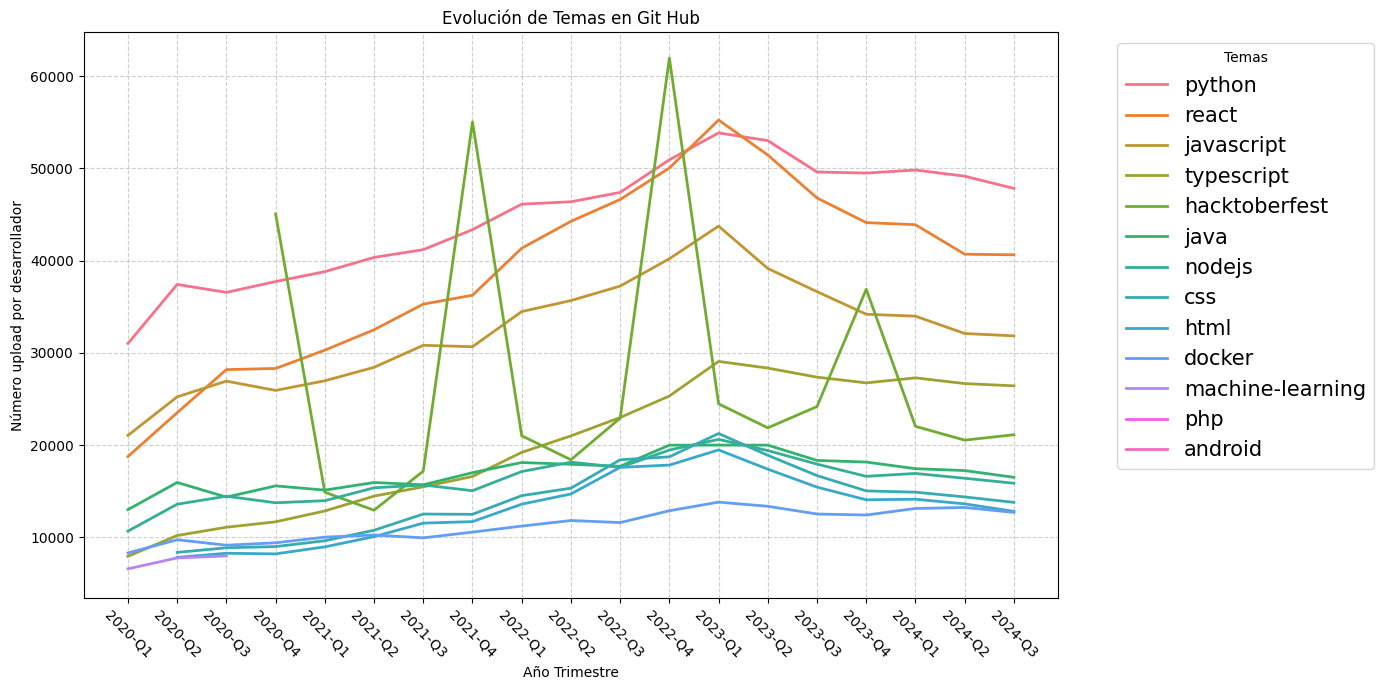

In [25]:
from matplotlib.ticker import FuncFormatter

# Create a custom formatter function to display values in millions
#def millions(x, pos):
    #return f'{x * 1e-6:.1f}M'  # Divide by 1e6 to convert to millions and format to one decimal place

# Paso opcional: Ordenar los temas de acuerdo con el valor máximo de 'num_pushers' en el último trimestre
latest_values = df_7_grouped_sorted.groupby('topic').apply(
    lambda x: x.loc[x['year_quarter'].idxmax(), 'num_pushers']
).sort_values(ascending=False)

ordered_topics = latest_values.index

# Crear el gráfico de líneas
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_7_grouped_sorted, x='year_quarter', y='num_pushers', hue='topic', 
             linewidth=2, hue_order=ordered_topics)

# Personalizar etiquetas y título
plt.xlabel('Año Trimestre')
plt.ylabel('Número upload por desarrollador')
plt.title('Evolución de Temas en Git Hub')

# Rotar las etiquetas del eje X para mejor legibilidad
plt.xticks(rotation=-45)


# Ajustar la leyenda si es necesario
plt.legend(title='Temas', loc='upper left', bbox_to_anchor=(1.05, 1),  prop={'size': 15})

# Mostrar cuadrículas para una mejor visualización
plt.grid(True, linestyle="--", alpha=0.6)

# Ajustar el layout para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [26]:
#df_7_topics_clean_nolanguage = df_7_topics_clean[~df_7_topics_clean["topic"].isin(["python", "javascript","java","typescript","python3","go","php","html","css","nodejs","golang"])]

In [42]:
df_7_topics_clean_nolanguage_filtered = df_7_topics_clean_nolanguage[df_7_topics_clean_nolanguage["indice"] <= 9]
df_7_topics_clean_nolanguage_filtered

,year,quarter,topic,num_pushers,indice,year_quarter
441,2020,1,react,18769,1,2020-Q1
168,2020,1,docker,8316,2,2020-Q1
323,2020,1,machine-learning,6597,3,2020-Q1
9,2020,1,android,6201,4,2020-Q1
21,2020,1,api,4425,5,2020-Q1
...,...,...,...,...,...,...
16131,2024,3,tailwindcss,11531,5,2024-Q3
15787,2024,3,machine-learning,10786,6,2024-Q3
15306,2024,3,api,8911,7,2024-Q3
15287,2024,3,ai,7140,8,2024-Q3


C:\Users\guill\AppData\Local\Temp\ipykernel_17612\353046335.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_values = df_7_topics_clean_nolanguage_filtered.groupby('topic').apply(


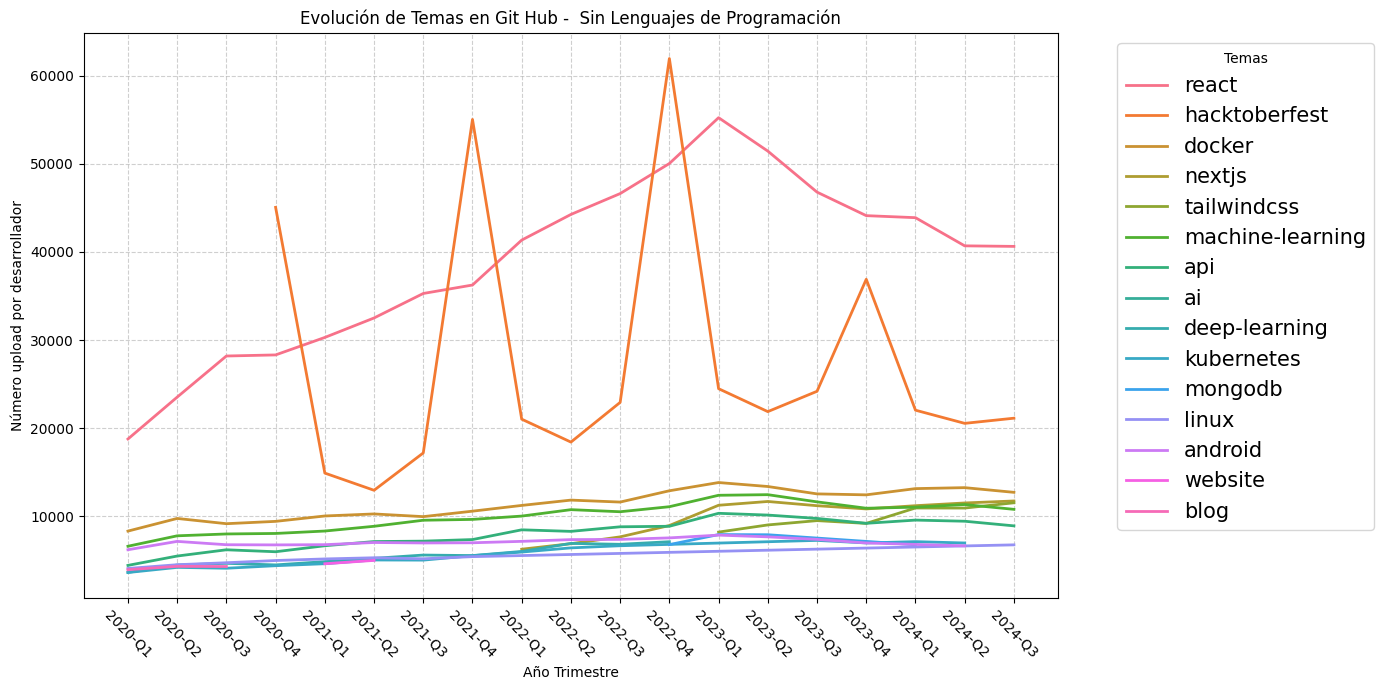

In [43]:


# Step 2: Get the most recent 'num_pushers' value for each 'topic' based on the latest 'year_quarter'
latest_values = df_7_topics_clean_nolanguage_filtered.groupby('topic').apply(
    lambda x: x.loc[x['year_quarter'].idxmax(), 'num_pushers']
).sort_values(ascending=False)

# Step 3: Reorder the 'topic' based on the most recent 'num_pushers'
ordered_topics_by_latest = latest_values.index

# Step 4: Create the line plot
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_7_topics_clean_nolanguage_filtered, x='year_quarter', y='num_pushers', hue='topic', 
             linewidth=2, hue_order=ordered_topics_by_latest)

# Customize labels and title
plt.xlabel('Año Trimestre')
plt.ylabel('Número upload por desarrollador')
plt.title('Evolución de Temas en Git Hub -  Sin Lenguajes de Programación')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=-45)

# Optional: Adjust the legend if needed
plt.legend(title='Temas', loc='upper left', bbox_to_anchor=(1.05, 1), prop={'size': 15})

# Show gridlines for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()

In [31]:
df_7_topics_clean_language_filtered = df_7_topics_clean_language[df_7_topics_clean_language["indice"] <= 7]
df_7_topics_clean_language_filtered

,year,quarter,topic,num_pushers,indice,year_quarter
432,2020,1,python,31021,1,2020-Q1
288,2020,1,javascript,21057,2,2020-Q1
286,2020,1,java,13016,3,2020-Q1
377,2020,1,nodejs,10685,4,2020-Q1
552,2020,1,typescript,7954,5,2020-Q1
...,...,...,...,...,...,...
16175,2024,3,typescript,26431,3,2024-Q3
15717,2024,3,java,16515,4,2024-Q3
15874,2024,3,nodejs,15877,5,2024-Q3
15458,2024,3,css,13802,6,2024-Q3


C:\Users\guill\AppData\Local\Temp\ipykernel_17612\3170596909.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_values = df_7_topics_clean_language_filtered.groupby('topic').apply(


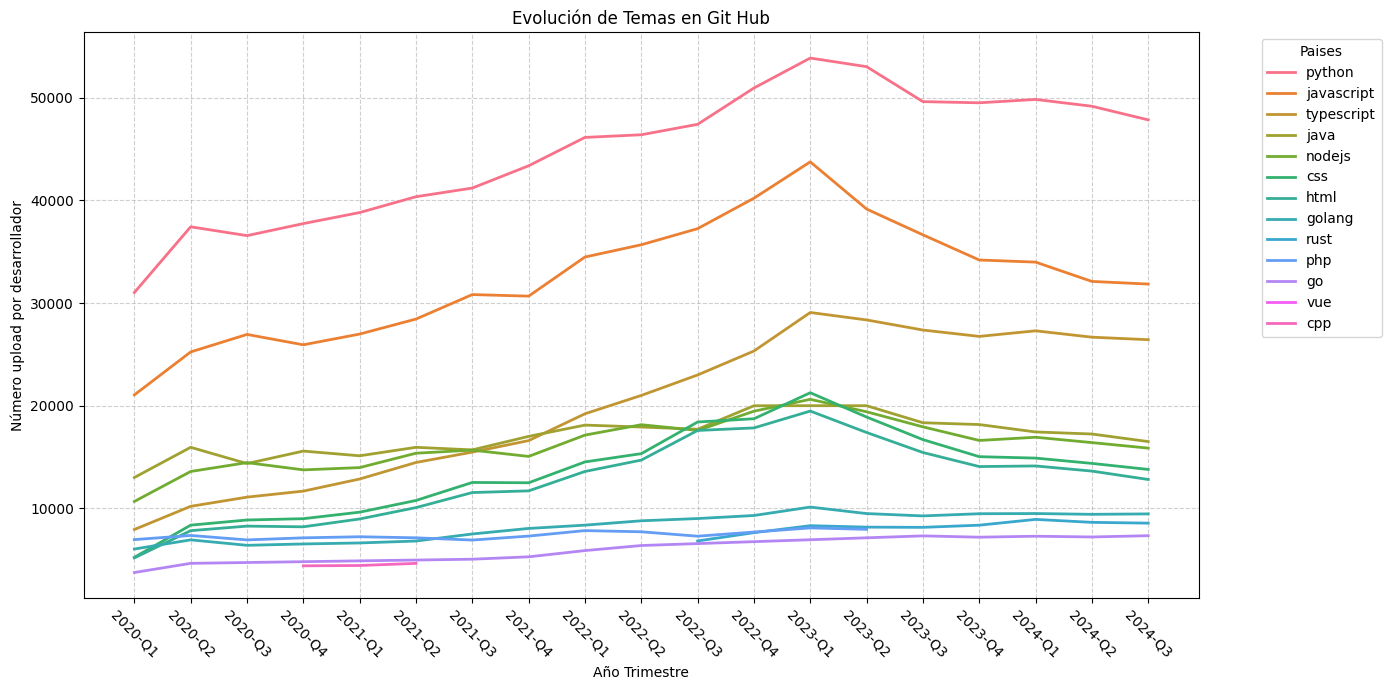

In [30]:
# Step 2: Get the most recent 'num_pushers' value for each 'topic' based on the latest 'year_quarter'
latest_values = df_7_topics_clean_language_filtered.groupby('topic').apply(
    lambda x: x.loc[x['year_quarter'].idxmax(), 'num_pushers']
).sort_values(ascending=False)

# Step 3: Reorder the 'topic' based on the most recent 'num_pushers'
ordered_topics_by_latest = latest_values.index

# Step 4: Create the line plot
plt.figure(figsize=(14, 7))

sns.lineplot(data=df_7_topics_clean_language_filtered, x='year_quarter', y='num_pushers', hue='topic', 
             linewidth=2, hue_order=ordered_topics_by_latest)

# Customize labels and title
plt.xlabel('Año Trimestre')
plt.ylabel('Número upload por desarrollador')
plt.title('Evolución de Temas en Git Hub')

# Rotate the x-tick labels for better readability
plt.xticks(rotation=-45)

# Optional: Adjust the legend if needed
plt.legend(title='Paises', loc='upper left', bbox_to_anchor=(1.05, 1))

# Show gridlines for better visualization
plt.grid(True, linestyle="--", alpha=0.6)

# Tight layout to prevent overlap
plt.tight_layout()

# Display the plot
plt.show()